## This section performs basic **Exploratory Data Analysis (EDA)** using the space mission dataset.
We're using **Pandas** for data handling and **Seaborn + Matplotlib** for visualizations.

Key steps:

Count the total number of space missions to understand dataset size.

Identify top organizations by number of launches using .value_counts().

Visualize the distribution of mission outcomes (Success, Failure, Partial) to assess launch reliability.

Check the rocket status (Active vs Retired) to see how many are still in use.

Analyze the most frequently used rockets by extracting rocket names from the Detail column.

Compare top 3 Countries over time in terms of success and launches.

Analyze rocket reuse and performance (same rocket used multiple times).

Track cost trends over decades — are missions getting cheaper or costlier?

Compare private vs government missions in terms of count and success.

*These visual insights help uncover patterns in the dataset like dominant agencies, rocket reusability, and operational success — which are crucial for future predictive modeling or trend analysis.*


Total Space Missions: 4324



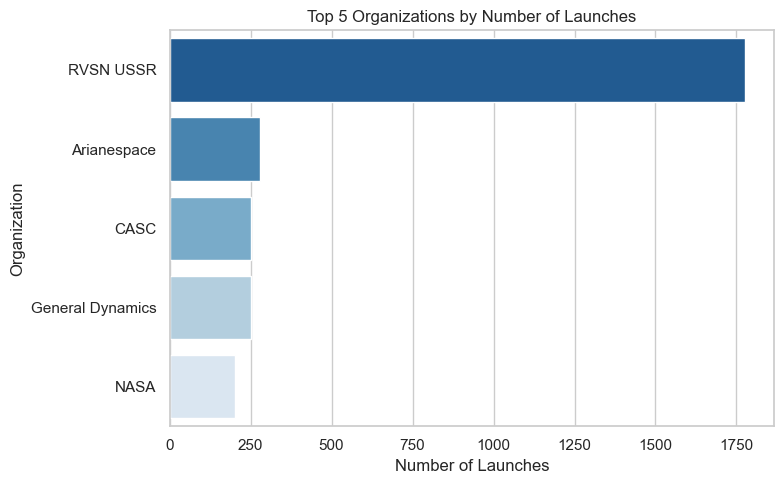

RVSN USSR has the most launches, probably from Cold War era. NASA and others follow.


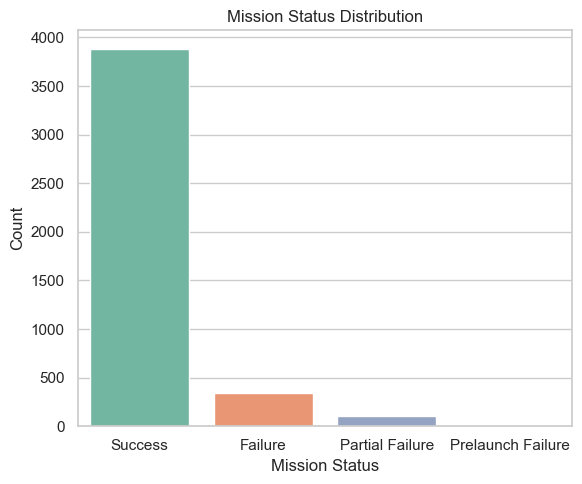

Most missions are successful. Some failed or had partial issues.


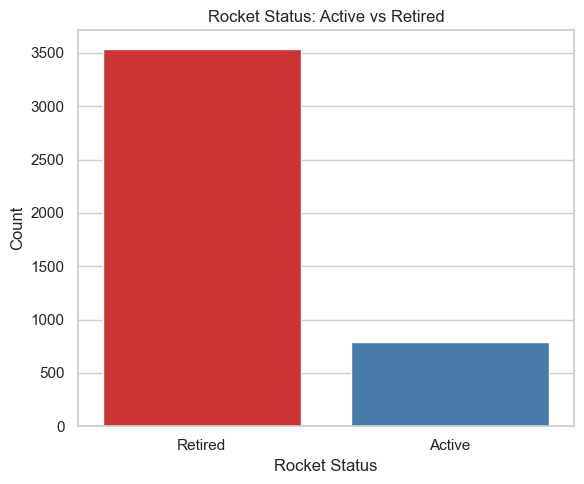

Majority of rockets are retired, which makes sense due to age.


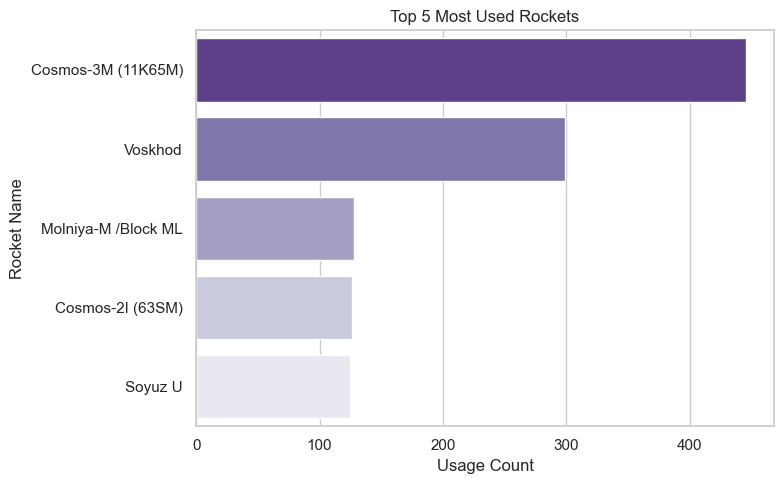

Rockets like Cosmos-3M were used a lot. They were probably reliable and affordable.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("space_mission_data_cleaned.csv")

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Total missions
total_missions = len(df)
print(f"\nTotal Space Missions: {total_missions}\n")

# Top 5 organisations
top_orgs = df['Organisation'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_orgs.values, y=top_orgs.index, hue=top_orgs.index, legend=False, palette="Blues_r")
plt.title("Top 5 Organizations by Number of Launches")
plt.xlabel("Number of Launches")
plt.ylabel("Organization")
plt.tight_layout()
plt.show()
print("RVSN USSR has the most launches, probably from Cold War era. NASA and others follow.")

# Mission status counts
mission_status_counts = df['Mission_Status'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=mission_status_counts.index, y=mission_status_counts.values,
            hue=mission_status_counts.index, legend=False, palette="Set2")
plt.title("Mission Status Distribution")
plt.xlabel("Mission Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("Most missions are successful. Some failed or had partial issues.")

# Rocket status
rocket_status_counts = df['Rocket_Status'].value_counts()
labels = rocket_status_counts.index.str.replace("Status", "").str.strip()
plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=rocket_status_counts.values, hue=labels, legend=False, palette="Set1")
plt.title("Rocket Status: Active vs Retired")
plt.xlabel("Rocket Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("Majority of rockets are retired, which makes sense due to age.")

# Most used rockets
rocket_names = df['Detail'].str.split('|').str[0].str.strip()
most_used_rockets = rocket_names.value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=most_used_rockets.values, y=most_used_rockets.index,
            hue=most_used_rockets.index, legend=False, palette="Purples_r")
plt.title("Top 5 Most Used Rockets")
plt.xlabel("Usage Count")
plt.ylabel("Rocket Name")
plt.tight_layout()
plt.show()
print("Rockets like Cosmos-3M were used a lot. They were probably reliable and affordable.")


Launches per Year by Top 3 Countries:
 Country  Kazakhstan  Russia   USA
Year                             
2016           11.0     6.0  27.0
2017           13.0     6.0  30.0
2018            9.0     8.0  33.0
2019           13.0     9.0  24.0
2020            6.0     3.0  21.0

 Successes per Year by Top 3 Countries:
 Country  Kazakhstan  Russia   USA
Year                             
2016           10.0     6.0  26.0
2017           12.0     5.0  30.0
2018            8.0     8.0  33.0
2019           13.0     9.0  24.0
2020            6.0     3.0  20.0


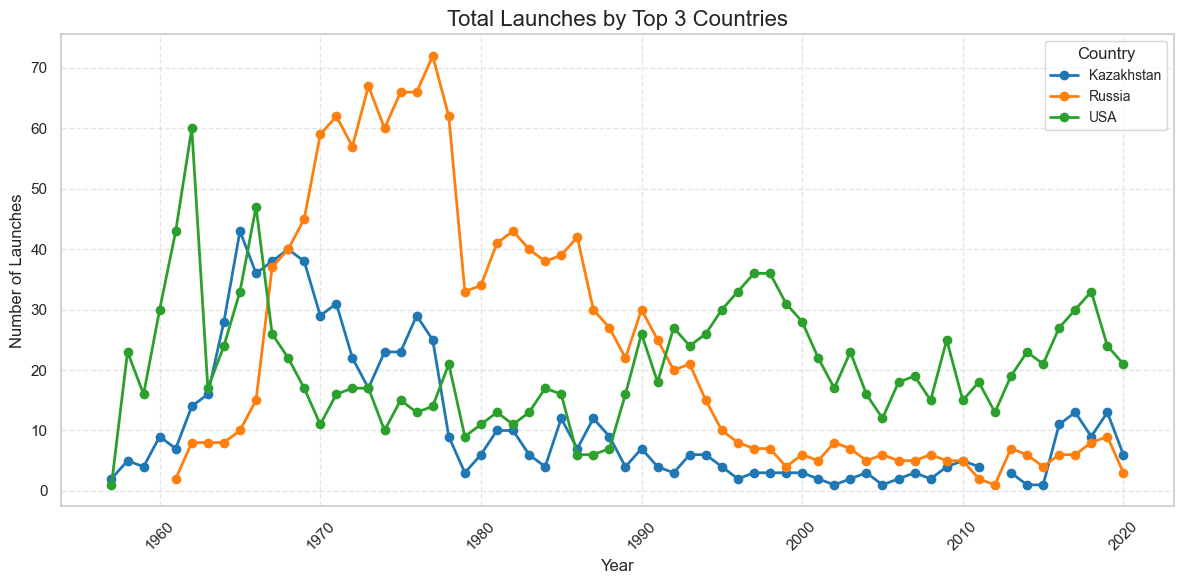

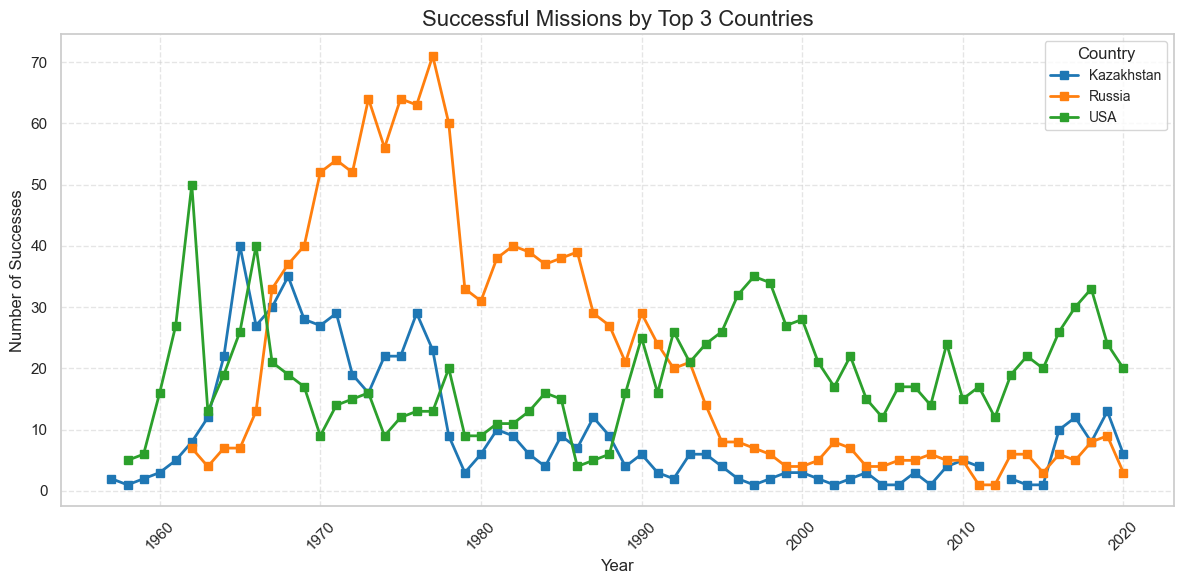

In [ ]:
# top 3 Countries over time in terms of success and launches.

# Merge Russian military organizations
df['Organisation'] = df['Organisation'].replace({
    'RVSN USSR': 'Russia Military',
    'VKS RF': 'Russia Military'
})

top_countries = df['Country'].value_counts().head(3).index.tolist()
df_top = df[df['Country'].isin(top_countries)]

launches = df_top.groupby(['Year', 'Country']).size().unstack()
successes = df_top[df_top['Mission_Status'] == 'Success'].groupby(['Year', 'Country']).size().unstack()

print("Launches per Year by Top 3 Countries:\n", launches.tail())
print("\n Successes per Year by Top 3 Countries:\n", successes.tail())

def plot_trends(data, title, ylabel, markers, colors):
    ax = data.plot(figsize=(12, 6), marker=markers, color=colors, linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Country', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plot_trends(launches, "Total Launches by Top 3 Countries", "Number of Launches", 'o', colors)

plot_trends(successes, "Successful Missions by Top 3 Countries", "Number of Successes", 's', colors)



3. Average Launch Cost by Decade (in million USD):
 Decade
1950     95.950980
1960     71.254031
1970     54.947134
1980     81.749287
1990    125.746121
2000    116.516779
2010     83.939601
2020     54.570000
Name: Price, dtype: float64


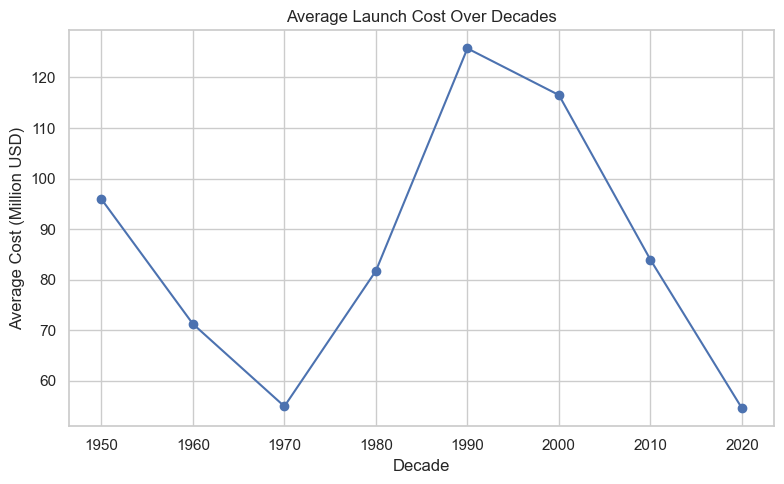

In [ ]:
# Cost Trends Over Decades
df['Decade'] = (df['Year'] // 10) * 10
cost_by_decade = df.groupby('Decade')['Price'].mean()

print("\n3. Average Launch Cost by Decade (in million USD):\n", cost_by_decade)

cost_by_decade.plot(kind='line', marker='o', title="Average Launch Cost Over Decades", figsize=(8, 5))
plt.ylabel("Average Cost (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



4. Mission Count by Type:
 Government    4199
Private        125
Name: Type, dtype: int64

4. Success Rate by Type:
 Type
Government    0.895928
Private       0.936000
dtype: float64


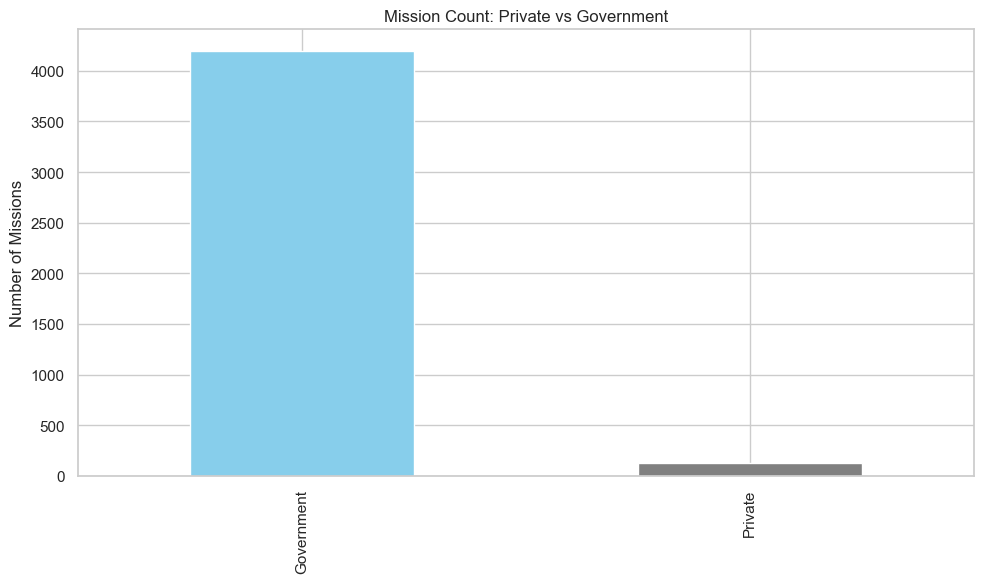

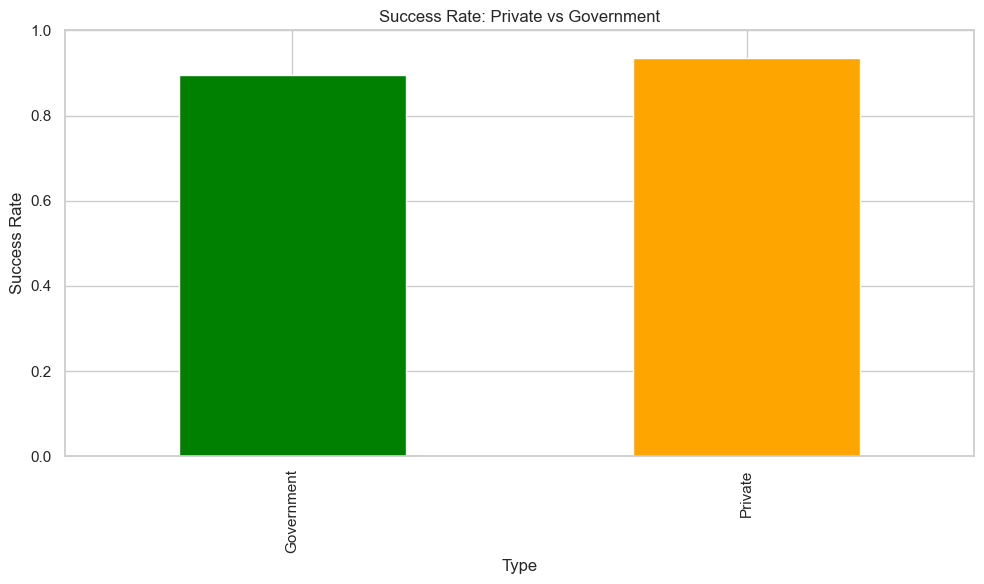

In [ ]:
# Private vs Government Missions

private_orgs = ['SpaceX', 'Blue Origin', 'Rocket Lab']
df['Type'] = df['Organisation'].apply(lambda x: 'Private' if x in private_orgs else 'Government')

mission_count = df['Type'].value_counts()
success_rate = df[df['Mission_Status'] == 'Success'].groupby('Type').size() / df.groupby('Type').size()

print("\n4. Mission Count by Type:\n", mission_count)
print("\n4. Success Rate by Type:\n", success_rate)

mission_count.plot(kind='bar', title="Mission Count: Private vs Government", color=['skyblue', 'gray'])
plt.ylabel("Number of Missions")
plt.tight_layout()
plt.show()

success_rate.plot(kind='bar', title="Success Rate: Private vs Government", color=['green', 'orange'])
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

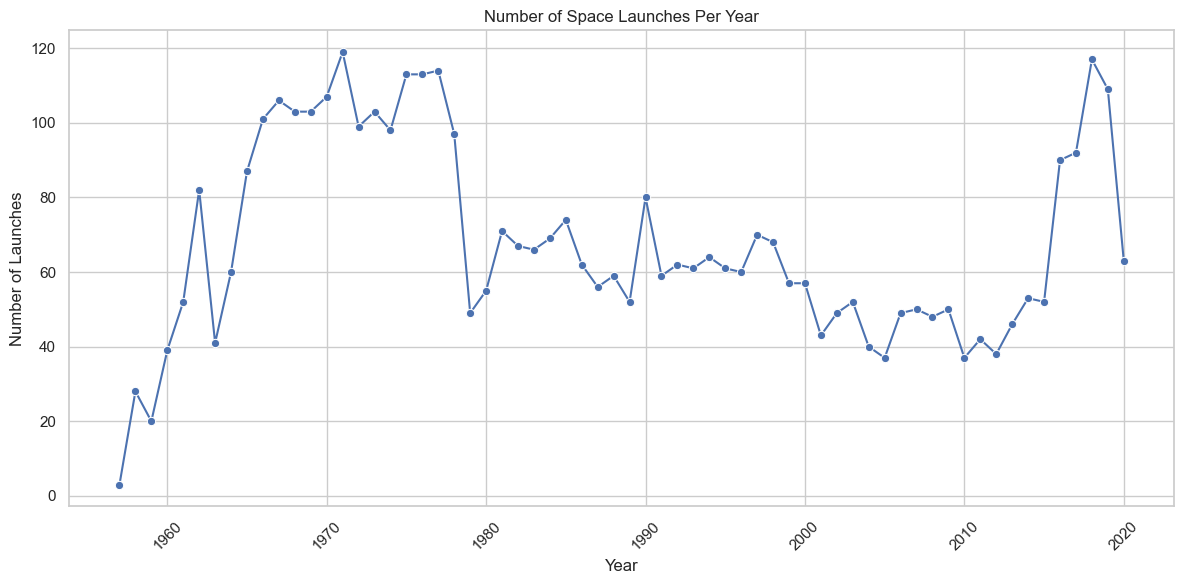

In [ ]:
# Number of launches per year (trend over time)
launches_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=launches_per_year.index, y=launches_per_year.values, marker='o')
plt.title('Number of Space Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


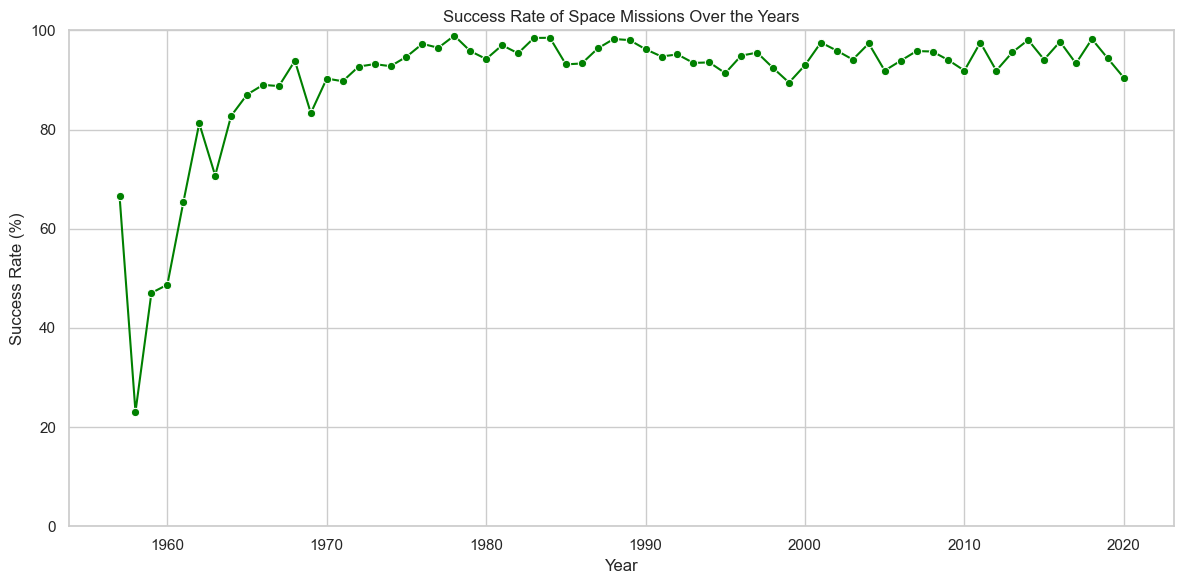

In [ ]:
# Success rate over the years (how it’s improved).
valid_status = df[df['Mission_Status'].isin(['Success', 'Failure'])]
success_by_year = valid_status.groupby(['Year', 'Mission_Status']).size().unstack().fillna(0)
success_by_year['Success_Rate'] = (success_by_year['Success'] /
                                   (success_by_year['Success'] + success_by_year['Failure'])) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x=success_by_year.index, y=success_by_year['Success_Rate'], marker='o', color='green')
plt.title('Success Rate of Space Missions Over the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_20636\1216001854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_per_org.values, y=avg_cost_per_org.index, palette='viridis')


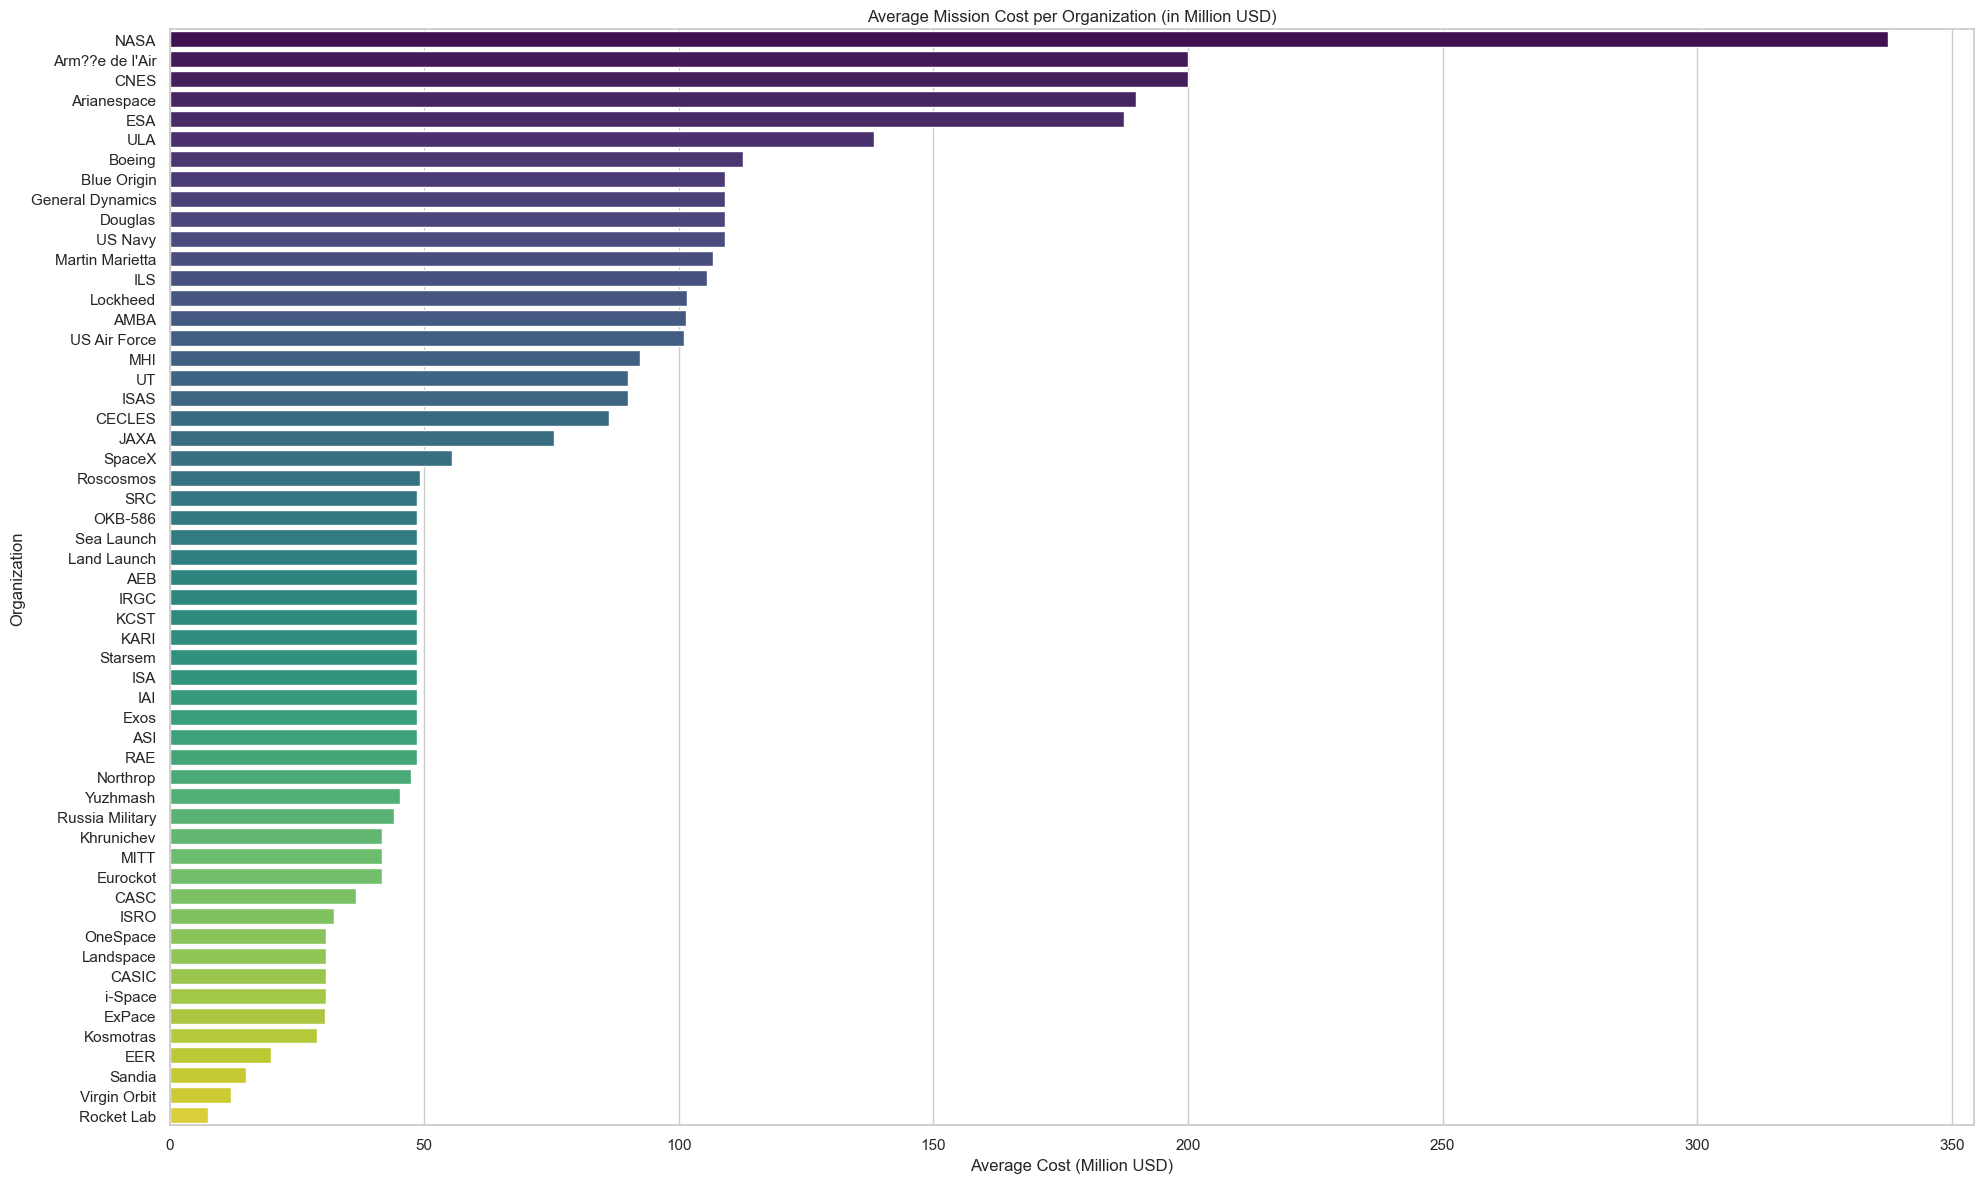

In [ ]:
# Average mission cost per organization.

cost_data = df[df['Price'].notna() & (df['Price'] > 0)]
avg_cost_per_org = cost_data.groupby('Organisation')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=avg_cost_per_org.values, y=avg_cost_per_org.index, palette='viridis')
plt.title('Average Mission Cost per Organization (in Million USD)')
plt.xlabel('Average Cost (Million USD)')
plt.ylabel('Organization')
plt.tight_layout()
plt.show()

C:\Users\saksh\AppData\Local\Temp\ipykernel_20636\246789306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mission_Status', y='Price', data=success_fail_data, palette='Set2')


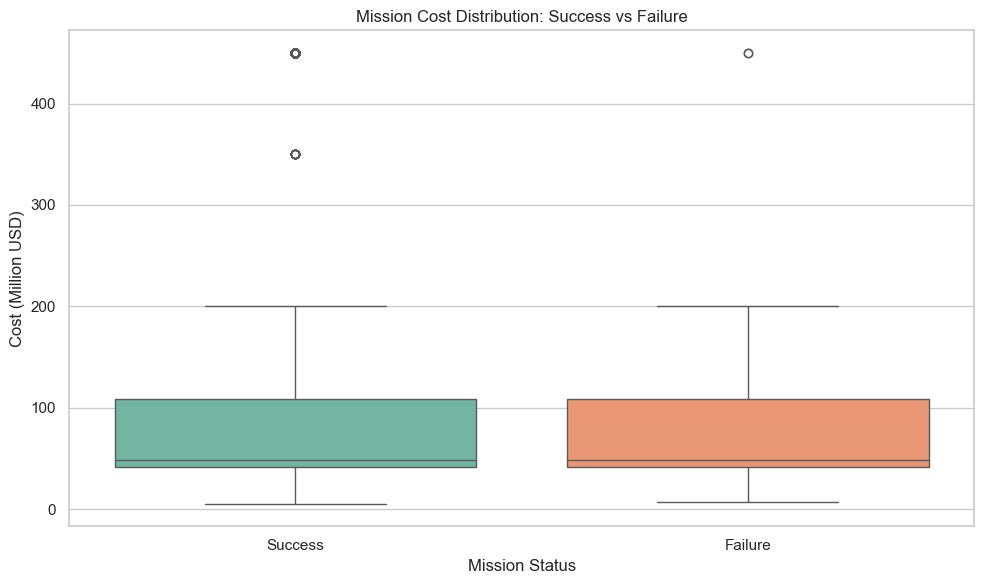

In [ ]:
# Comparing success vs failure based on mission cost.

success_fail_data = df[df['Mission_Status'].isin(['Success', 'Failure']) & df['Price'].notna()]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mission_Status', y='Price', data=success_fail_data, palette='Set2')
plt.title('Mission Cost Distribution: Success vs Failure')
plt.xlabel('Mission Status')
plt.ylabel('Cost (Million USD)')
plt.tight_layout()
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_20636\3092594677.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations['Success_Rate'], y=top_locations.index, palette='coolwarm')


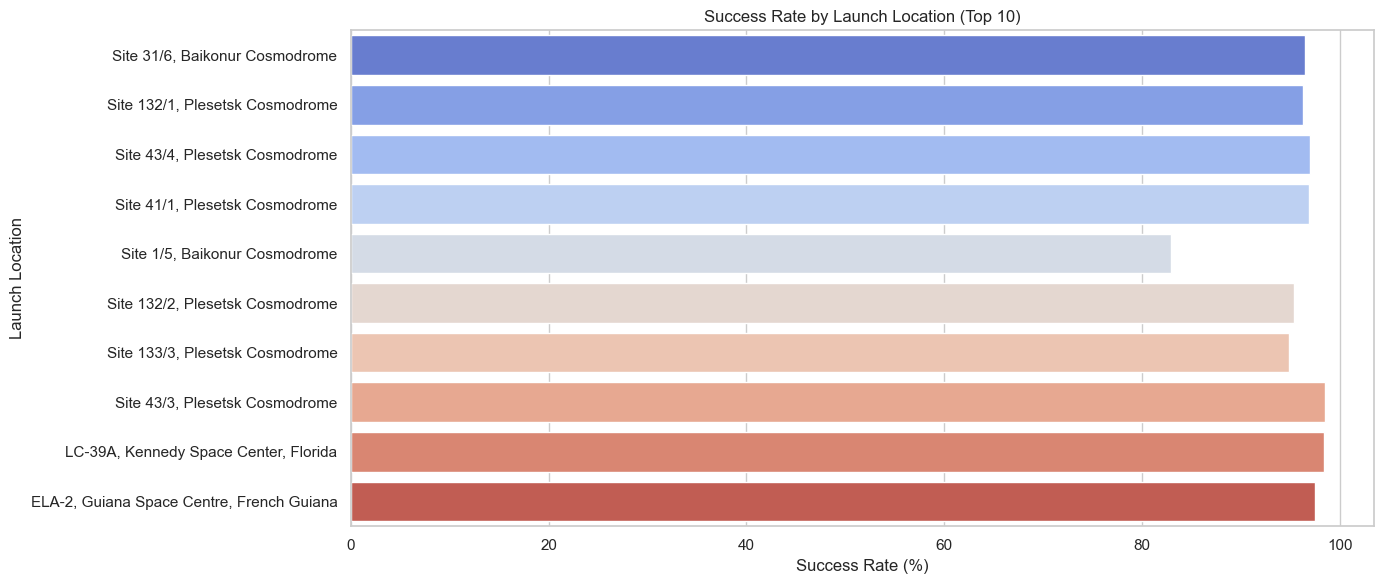

Mission_Status                             Failure  Success  Total_Launches  \
Space_Centre_Name                                                             
Site 43/3, Plesetsk Cosmodrome                 2.0    131.0           133.0   
LC-39A, Kennedy Space Center, Florida          2.0    117.0           119.0   
ELA-2, Guiana Space Centre, French Guiana      3.0    115.0           118.0   
Site 43/4, Plesetsk Cosmodrome                 6.0    190.0           196.0   
Site 41/1, Plesetsk Cosmodrome                 6.0    186.0           192.0   
Site 31/6, Baikonur Cosmodrome                 8.0    220.0           228.0   
Site 132/1, Plesetsk Cosmodrome                8.0    203.0           211.0   
Site 132/2, Plesetsk Cosmodrome                8.0    164.0           172.0   
Site 133/3, Plesetsk Cosmodrome                8.0    147.0           155.0   
Site 1/5, Baikonur Cosmodrome                 32.0    155.0           187.0   

Mission_Status                             Success_

In [ ]:
# Success rate by launch location (Top 10 most used locations)

location_data = df[df['Mission_Status'].isin(['Success', 'Failure'])]

location_stats = location_data.groupby(['Space_Centre_Name', 'Mission_Status']).size().unstack().fillna(0)

location_stats['Total_Launches'] = location_stats.sum(axis=1)
location_stats['Success_Rate'] = (location_stats['Success'] / location_stats['Total_Launches']) * 100

top_locations = location_stats.sort_values(by='Total_Launches', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_locations['Success_Rate'], y=top_locations.index, palette='coolwarm')
plt.title('Success Rate by Launch Location (Top 10)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Launch Location')
plt.tight_layout()
plt.show()

top_success_location = top_locations.sort_values(by='Success_Rate', ascending=False).head(10)
print(top_success_location)



C:\Users\saksh\AppData\Local\Temp\ipykernel_20636\2426165009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


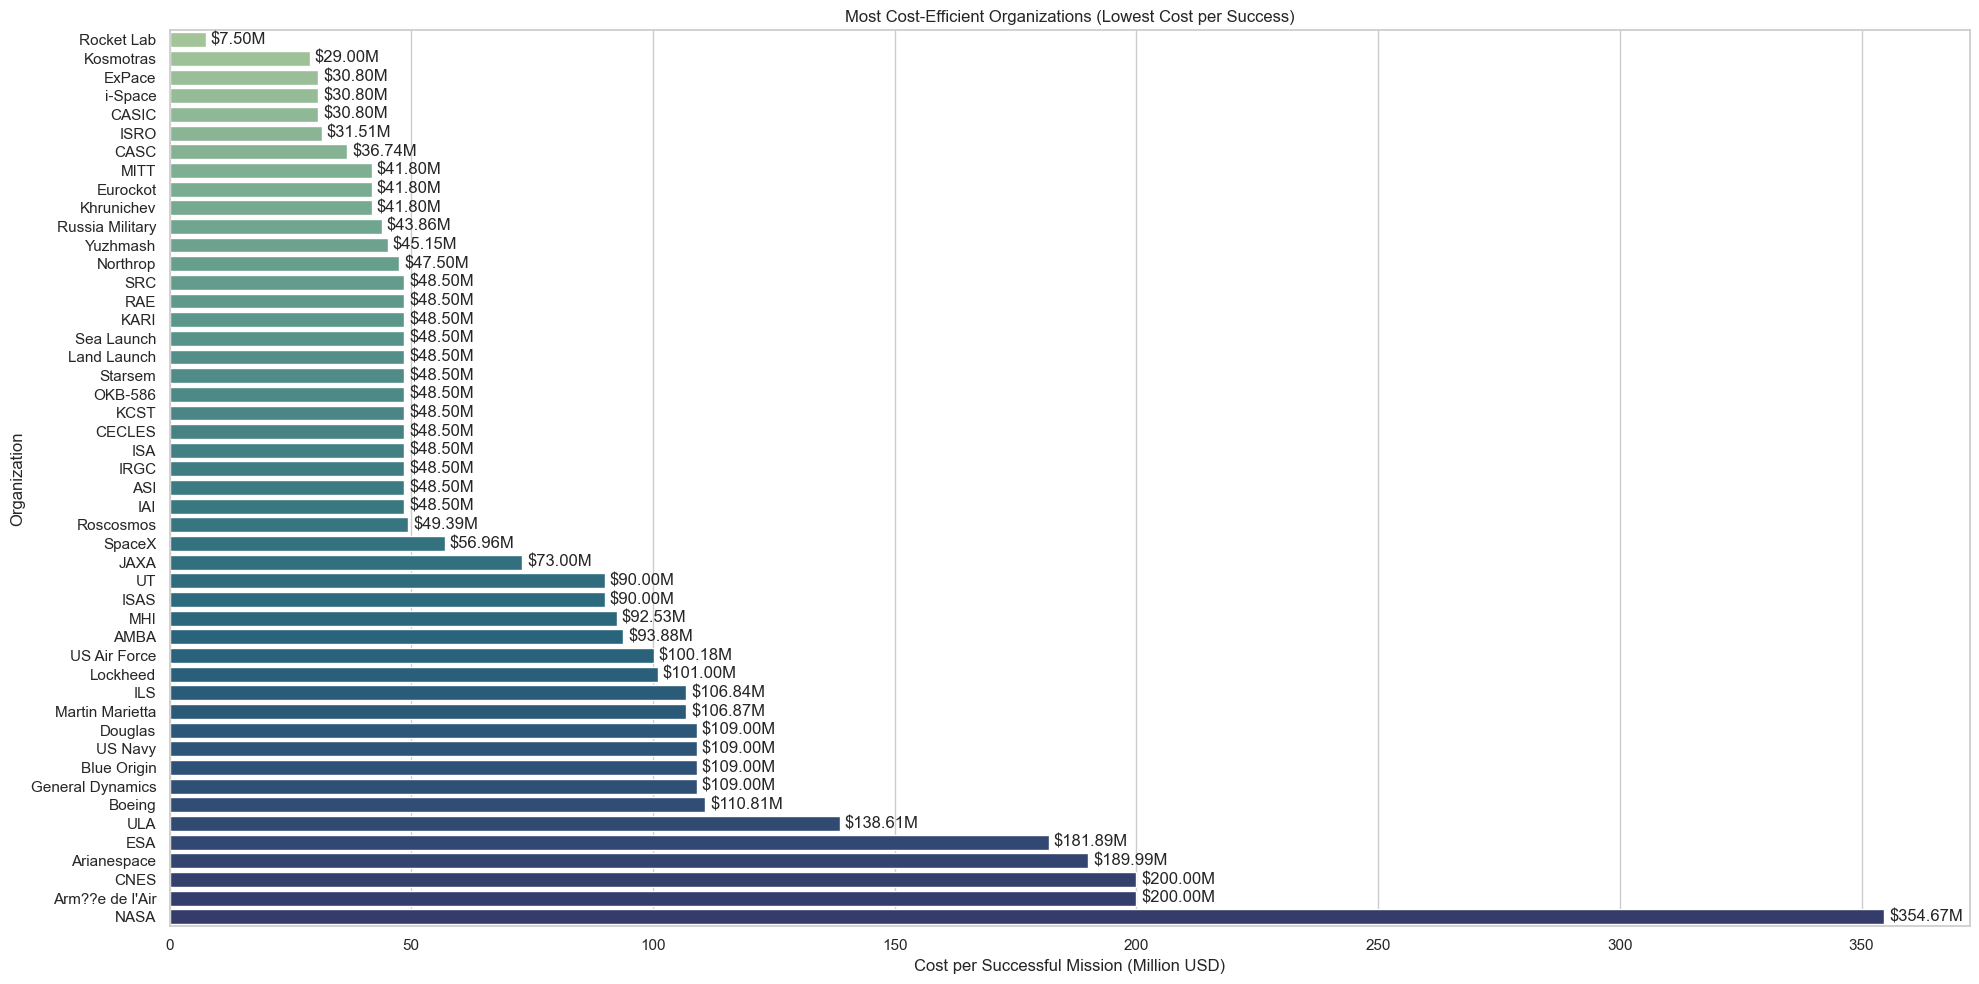

In [ ]:
# Most cost-efficient organization (lowest cost per success).
import matplotlib.pyplot as plt
import seaborn as sns

success_cost = df[(df['Mission_Status'] == 'Success') & df['Price'].notna() & (df['Price'] > 0)]

org_efficiency = success_cost.groupby('Organisation').agg({'Price': 'sum', 'Mission_Status': 'count'})
org_efficiency['Cost_Per_Success'] = org_efficiency['Price'] / org_efficiency['Mission_Status']
org_efficiency_sorted = org_efficiency.sort_values(by='Cost_Per_Success')

plt.figure(figsize=(20, 10))
barplot = sns.barplot(
    x=org_efficiency_sorted['Cost_Per_Success'],
    y=org_efficiency_sorted.index,
    palette='crest'
)

for index, value in enumerate(org_efficiency_sorted['Cost_Per_Success']):
    barplot.text(
        value + 1,
        index,
        f"${value:.2f}M",
        va='center'
    )

plt.title('Most Cost-Efficient Organizations (Lowest Cost per Success)')
plt.xlabel('Cost per Successful Mission (Million USD)')
plt.ylabel('Organization')
plt.tight_layout()
plt.show()
